In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
brfss = pd.read_csv('../data/Nutrition.csv')

# Explore Dataset

In [3]:
#explore the data
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [4]:
print("Number of rows:", len(brfss))
print("Number of columns (variables in the survey):", len(brfss.columns))
print(brfss.columns)

Number of rows: 104272
Number of columns (variables in the survey): 33
Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [5]:
brfss.isnull().sum()

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                15400
Data_Value_Type                    0
Data_Value                     10767
Data_Value_Alt                 10767
Data_Value_Footnote_Symbol     93505
Data_Value_Footnote            93505
Low_Confidence_Limit           10767
High_Confidence_Limit          10767
Sample_Size                    10767
Total                         100548
Age(years)                     81928
Education                      89376
Gender                         96824
Income                         78204
Race/Ethnicity                 74480
GeoLocation                     1932
ClassID                            0
TopicID                            0
QuestionID                         0
D

In [6]:
brfss.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [7]:
# create new short df
brfss_short = brfss[['YearStart', 'LocationAbbr','Class', 'Topic', 'Question', 'Data_Value',
                     'Data_Value_Alt', 'Data_Value_Footnote_Symbol','Data_Value_Footnote','Sample_Size', 'Total',
                     'Age(years)', 'Education', 'Gender', 'Income','Race/Ethnicity']]

In [8]:
for col in brfss_short.columns:
    if col != "Data_Value" and col != "Data_Value_Alt":
        print("The Unique Values for {0} are: {1}".format(col,brfss_short[col].unique()))

The Unique Values for YearStart are: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
The Unique Values for LocationAbbr are: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'PR' 'GU' 'VI']
The Unique Values for Class are: ['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']
The Unique Values for Topic are: ['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']
The Unique Values for Question are: ['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a we

In [9]:
insufficient_rows = brfss_short[brfss_short['Data_Value_Footnote'] == 'Data not available because sample size is insufficient.']
print("There are {0} rows from brfss_short total {1} which are missing data because sample size is insufficient".format(len(insufficient_rows),len(brfss_short)))
print(insufficient_rows.info())
print(insufficient_rows['Question'].unique())
print(insufficient_rows['Data_Value_Footnote_Symbol'].unique())
print(insufficient_rows['Race/Ethnicity'].unique())


There are 10767 rows from brfss_short total 104272 which are missing data because sample size is insufficient
<class 'pandas.core.frame.DataFrame'>
Index: 10767 entries, 9 to 104263
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   10767 non-null  int64  
 1   LocationAbbr                10767 non-null  object 
 2   Class                       10767 non-null  object 
 3   Topic                       10767 non-null  object 
 4   Question                    10767 non-null  object 
 5   Data_Value                  0 non-null      float64
 6   Data_Value_Alt              0 non-null      float64
 7   Data_Value_Footnote_Symbol  10767 non-null  object 
 8   Data_Value_Footnote         10767 non-null  object 
 9   Sample_Size                 0 non-null      float64
 10  Total                       40 non-null     object 
 11  Age(years)                  240 non-nul

In [10]:
display(insufficient_rows.head(5))
display(insufficient_rows.tail(5))

,YearStart,LocationAbbr,Class,Topic,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
9,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Asian
10,2011,AK,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Asian
12,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Asian
18,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander
30,2011,AK,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black


,YearStart,LocationAbbr,Class,Topic,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
104233,2023,WY,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black
104237,2023,WY,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black
104238,2023,WY,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Other
104248,2023,WY,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander
104263,2023,WY,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black


# Transform & Clean Data

In [11]:
# Drop empty data value rows
brfss_short.dropna(subset=['Data_Value'],inplace=True)
print("A total of {0} rows remain of the {1} original rows".format(len(brfss_short),len(brfss)))

A total of 93505 rows remain of the 104272 original rows


In [12]:
#isolate physical activity questions
activity = brfss_short[brfss_short['Class']=='Physical Activity']
activity.head()

,YearStart,LocationAbbr,Class,Topic,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity
2,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,21.7,21.7,NaN,NaN,1702.0,NaN,NaN,NaN,Female,NaN,NaN
6,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,28.8,28.8,NaN,NaN,232.0,NaN,NaN,Less than high school,NaN,NaN,NaN
8,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,35.9,35.9,NaN,NaN,2417.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White
13,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,17.3,17.3,NaN,NaN,349.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN
16,2011,AK,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,19.2,19.2,NaN,NaN,530.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN


In [13]:
activity['Question'].unique()

array(['Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],
      dtype=object)

In [14]:
moderate_activity1 = activity[activity['Question'].str.contains('Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', na=False)]
print("Years where moderate activity formulation 1 was asked:{0}".format(moderate_activity1['YearStart'].unique()))

moderate_activity2 = activity[activity['Question'].str.contains("or an equivalent combination", na=False) & activity['Question'].str.contains("75 minutes", na=False)]
print("Years where moderate activity formulation 2 was asked:{0}".format(moderate_activity2['YearStart'].unique()))

intense_activity = activity[activity['Question'].str.contains('300 minutes', na=False)]
print("Years where intense activity was asked:{0}".format(intense_activity['YearStart'].unique()))

leisure_activity = activity[activity['Question'].str.contains('Percent of adults who engage in no leisure-time physical activity', na=False)]
print("Years where leisure activity was asked:{0}".format(leisure_activity['YearStart'].unique()))

Years where moderate activity formulation 1 was asked:[2011 2013 2015 2017 2019 2023]
Years where moderate activity formulation 2 was asked:[2011 2013 2015 2017 2019 2023]
Years where intense activity was asked:[2011 2013 2015 2017 2019 2023]
Years where leisure activity was asked:[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [15]:
# drop even number years for consistency
even_years = [2012 , 2014 , 2016 , 2018 , 2020 , 2021, 2022]
activity = activity[~activity['YearStart'].isin(even_years)]
activity['YearStart'].unique()

array([2011, 2013, 2015, 2017, 2019, 2021, 2023])

In [16]:
# create simple question column for visualization
question_mapping = {
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week': 'Moderate Exercise & Muscle Strengthening',
    'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week': 'Muscle Strengthening',
    'Percent of adults who engage in no leisure-time physical activity': 'No Leisure-time Physical Activity',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 'Moderate Exercise',
    'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 'Intense exercise'
}
activity['Short_Question'] = activity['Question'].map(question_mapping)
print(activity[['Question', 'Short_Question']].head())

                                             Question  \
2   Percent of adults who achieve at least 150 min...   
6   Percent of adults who engage in muscle-strengt...   
8   Percent of adults who engage in muscle-strengt...   
13  Percent of adults who achieve at least 150 min...   
16  Percent of adults who engage in no leisure-tim...   

                              Short_Question  
2   Moderate Exercise & Muscle Strengthening  
6                       Muscle Strengthening  
8                       Muscle Strengthening  
13  Moderate Exercise & Muscle Strengthening  
16         No Leisure-time Physical Activity  


In [17]:
from datetime import datetime
activity['Year'] = activity['YearStart'].apply(lambda x: datetime(x, 1, 1).strftime('%Y'))

# Visualize Data

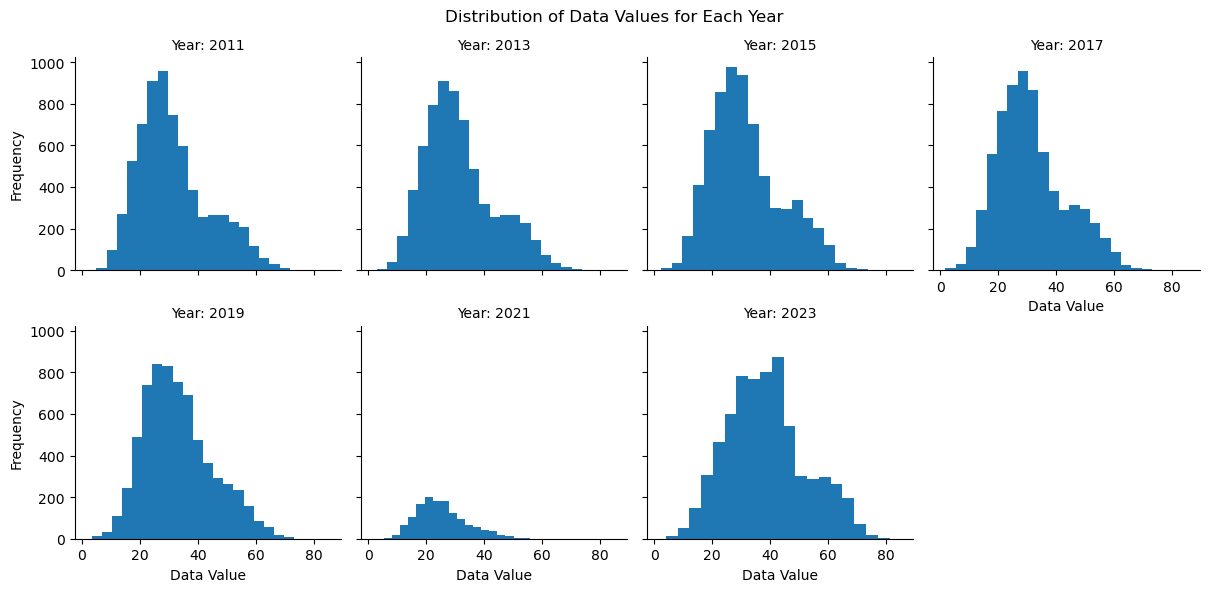

In [18]:
# Create the facet grid of histograms
# Use FacetGrid to create a grid of histograms split by 'YearStart'
g = sns.FacetGrid(activity, col="Year", col_wrap=4, height=3)
g.map(plt.hist, 'Data_Value', bins=20)

# Adding some additional aesthetic enhancements
g.set_titles('Year: {col_name}')  # Set titles for each subplot
g.set_axis_labels('Data Value', 'Frequency')  # Set axis labels

# Adjust the axis and display the plots
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Data Values for Each Year')  # Overall title for all subplots

# Show the plot
plt.show()

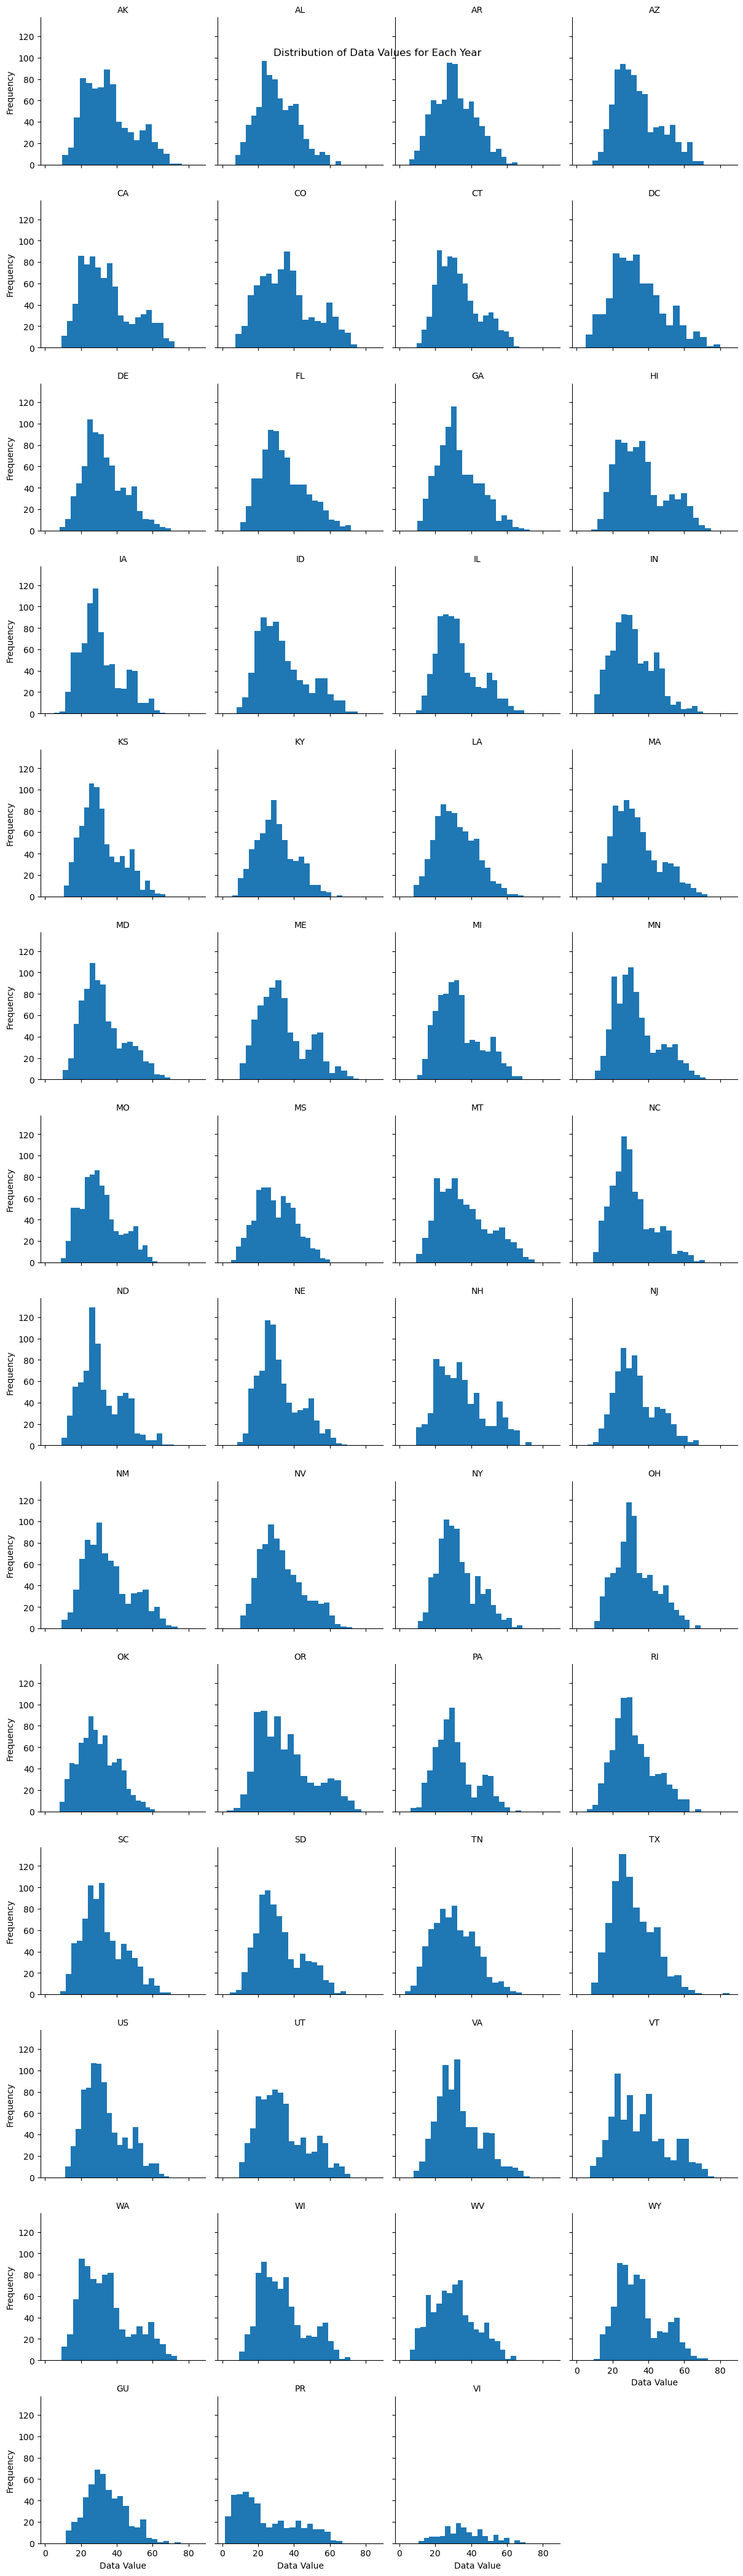

In [19]:
# Create the facet grid of histograms
# Use FacetGrid to create a grid of histograms split by 'YearStart'
g = sns.FacetGrid(activity, col="LocationAbbr", palette='viridis', col_wrap=4)
g.map(plt.hist, 'Data_Value', bins=20)

# Adding some additional aesthetic enhancements
g.set_titles('{col_name}')  # Set titles for each subplot
g.set_axis_labels('Data Value', 'Frequency')  # Set axis labels

# Adjust the axis and display the plots
g.fig.suptitle('Distribution of Data Values for Each Year')  # Overall title for all subplots

# Show the plot
plt.show()

In [20]:
activity = activity[activity['Income'] != 'Data not reported']
activity['Income'].unique()

array([nan, '$15,000 - $24,999', '$50,000 - $74,999',
       '$75,000 or greater', '$25,000 - $34,999', 'Less than $15,000',
       '$35,000 - $49,999'], dtype=object)

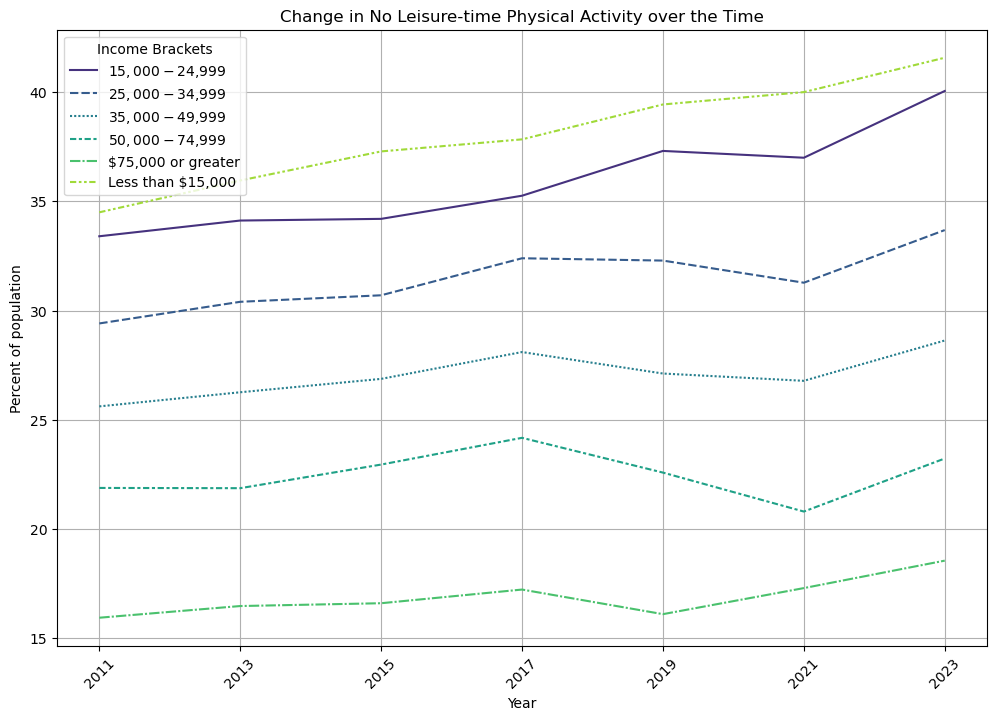

In [21]:
no_activity = activity[activity['Short_Question']=='No Leisure-time Physical Activity']

# Group data by year and income to see the mean physical activity level
no_activity_by_year_income = no_activity.groupby(['Year', 'Income'])['Data_Value'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=no_activity_by_year_income, palette='viridis')
plt.title('Change in No Leisure-time Physical Activity over the Time')
plt.ylabel('Percent of population')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Income Brackets')
plt.grid(True)
plt.show()

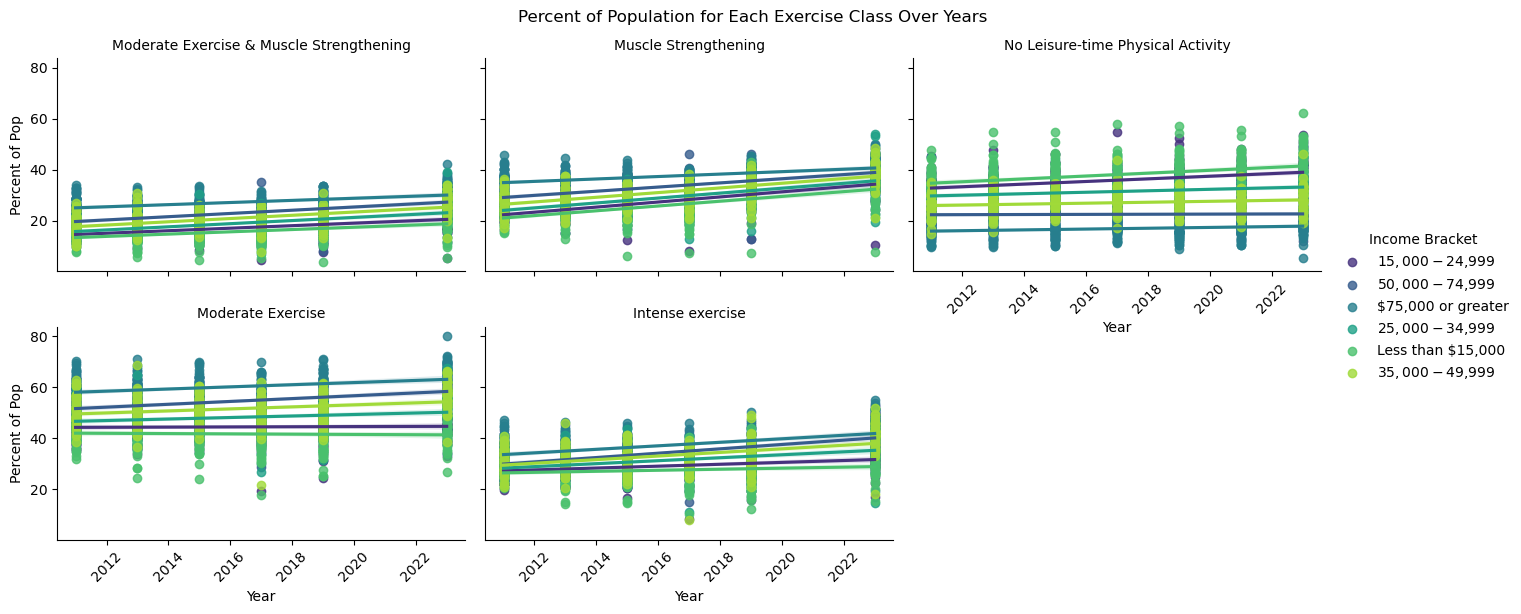

In [ ]:
g = sns.FacetGrid(activity, col="Short_Question", hue='Income', col_wrap=3, aspect=1.5, palette='viridis')
g.map(sns.regplot, 'YearStart', 'Data_Value', )

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Enhancing the plot with titles and labels
g.set_titles('{col_name}')  # Set titles to be each question
g.set_axis_labels('Year', 'Percent of Pop')  # Set common axis labels

# Adjust the top space to accommodate title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Percent of Population for Each Exercise Class Over Years')

# Adding the legend
g.add_legend(title='Income Bracket')
# Show the plot
plt.show()

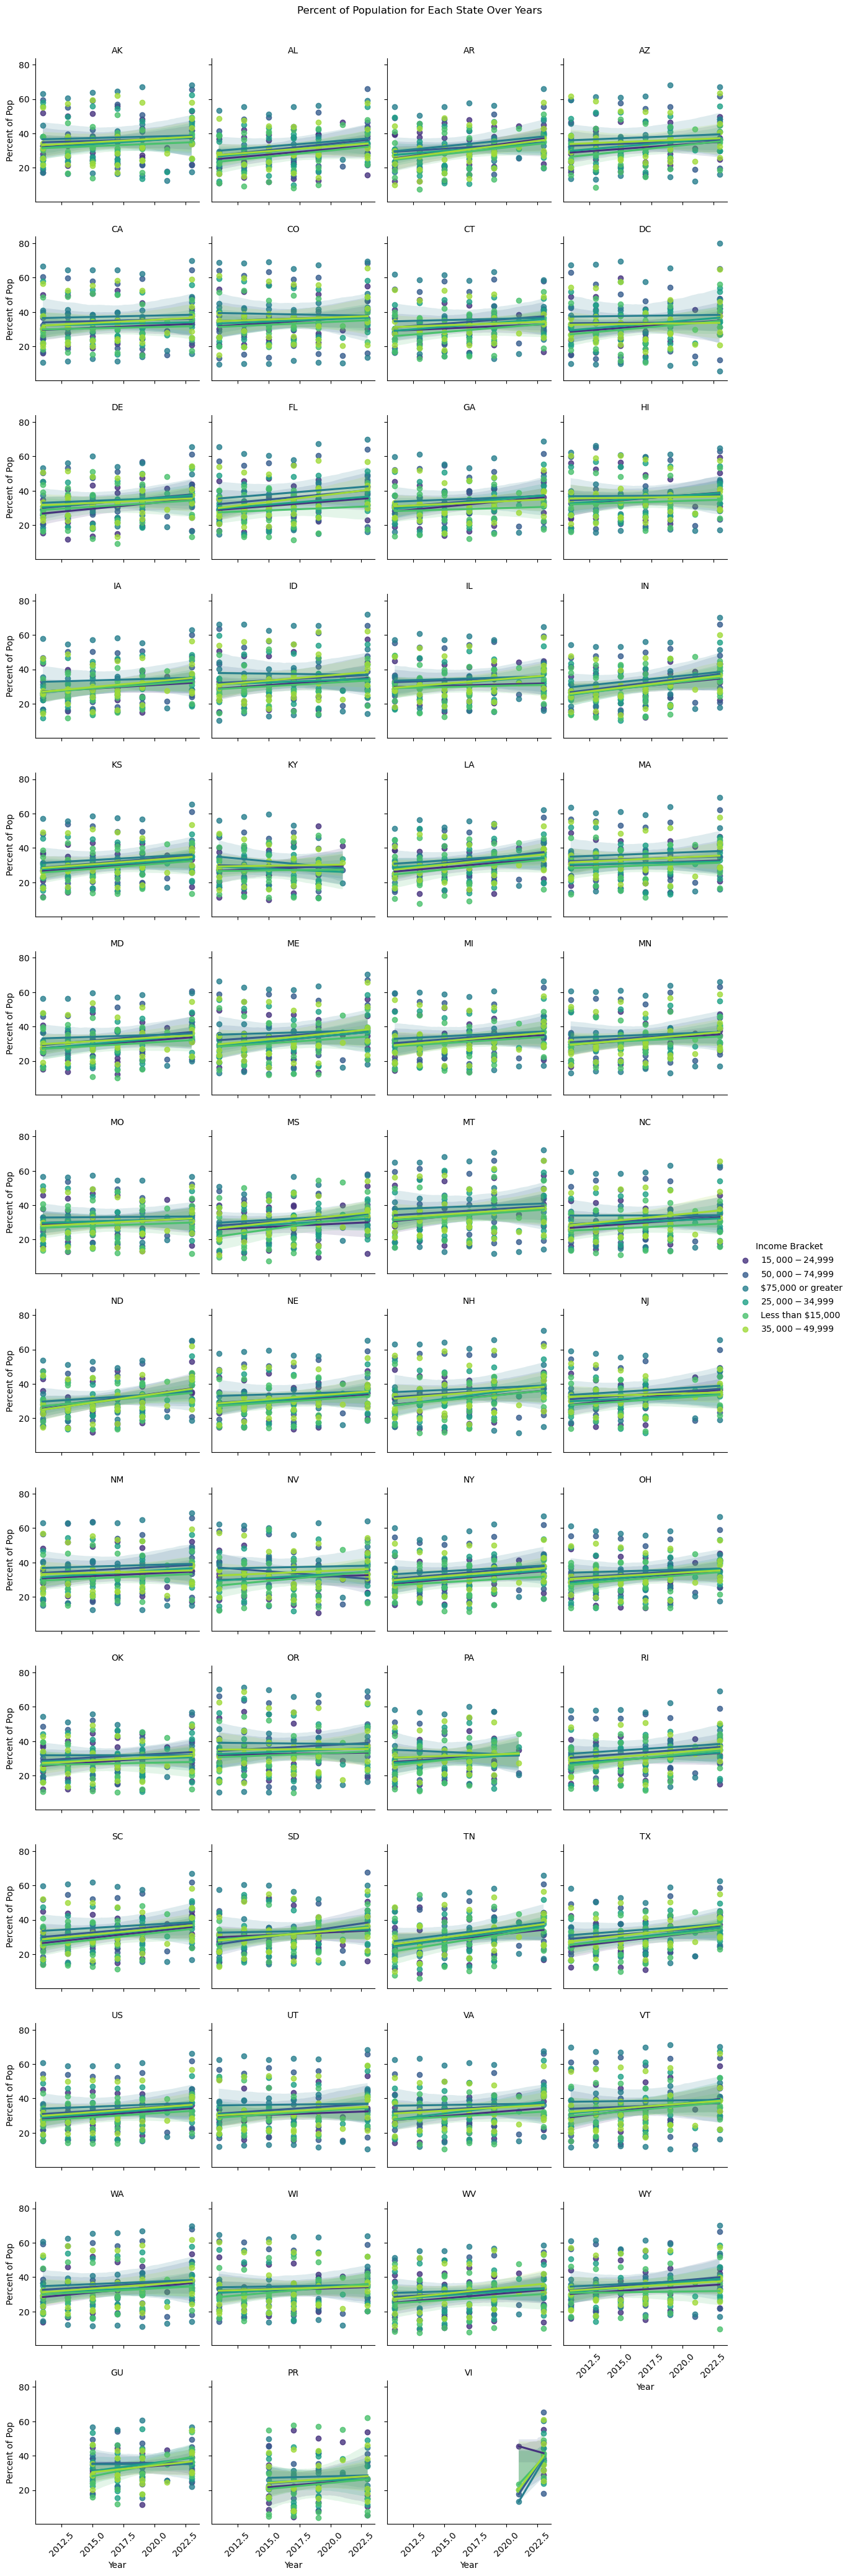

In [24]:
g = sns.FacetGrid(activity, col="LocationAbbr", hue='Income', col_wrap=4, palette='viridis')
g.map(sns.regplot, 'YearStart', 'Data_Value', )

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Enhancing the plot with titles and labels
g.set_titles('{col_name}')  # Set titles to be each question
g.set_axis_labels('Year', 'Percent of Pop')  # Set common axis labels

# Adjust the top space to accommodate title
plt.subplots_adjust(top=0.96)
g.fig.suptitle('Percent of Population for Each State Over Years')

# Adding the legend
g.add_legend(title='Income Bracket')
# Show the plot
plt.show()

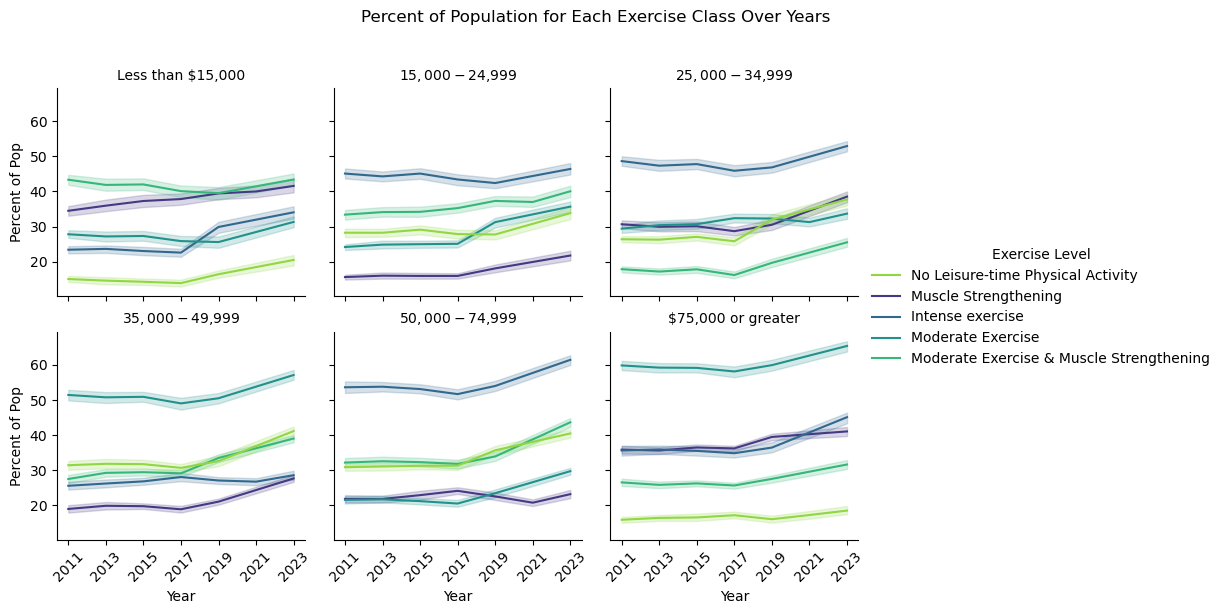

In [23]:
income_order = ['Less than $15,000','$15,000 - $24,999','$25,000 - $34,999','$35,000 - $49,999','$50,000 - $74,999','$75,000 or greater']
g = sns.FacetGrid(activity, col="Income", col_order=income_order, col_wrap=3)
g.map(sns.lineplot, 'Year', 'Data_Value', 'Short_Question', palette='viridis')

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Enhancing the plot with titles and labels
g.set_titles('{col_name}')  # Set titles to be each Income Bracket
g.set_axis_labels('Year', 'Percent of Pop')  # Set common axis labels

# Adjust the top space to accommodate title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Percent of Population for Each Exercise Class Over Years')

# Adding the legend
g.add_legend(title='Exercise Level')
# Show the plot
plt.show()

In [27]:
activity_US = activity[activity['LocationAbbr']=='US']
activity_US.head(10)

,YearStart,LocationAbbr,Class,Topic,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,Short_Question,Year
8625,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,18.4,18.4,NaN,NaN,47056.0,NaN,NaN,NaN,NaN,"$25,000 - $34,999",NaN,Moderate Exercise & Muscle Strengthening,2011
8626,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,31.2,31.2,NaN,NaN,6463.0,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,Muscle Strengthening,2011
8627,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,21.6,21.6,NaN,NaN,65153.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,No Leisure-time Physical Activity,2011
8628,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,20.4,20.4,NaN,NaN,59066.0,NaN,35 - 44,NaN,NaN,NaN,NaN,Moderate Exercise & Muscle Strengthening,2011
8629,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,24.2,24.2,NaN,NaN,72819.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,Muscle Strengthening,2011
8630,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,27.8,27.8,NaN,NaN,61088.0,NaN,NaN,NaN,NaN,"$35,000 - $49,999",NaN,Muscle Strengthening,2011
8632,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,50.2,50.2,NaN,NaN,277769.0,NaN,NaN,NaN,Female,NaN,NaN,Moderate Exercise,2011
8633,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,50.9,50.9,NaN,NaN,104475.0,NaN,55 - 64,NaN,NaN,NaN,NaN,Moderate Exercise,2011
8634,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,33.3,33.3,NaN,NaN,73792.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,No Leisure-time Physical Activity,2011
8635,2011,US,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,34.2,34.2,NaN,NaN,49590.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,No Leisure-time Physical Activity,2011


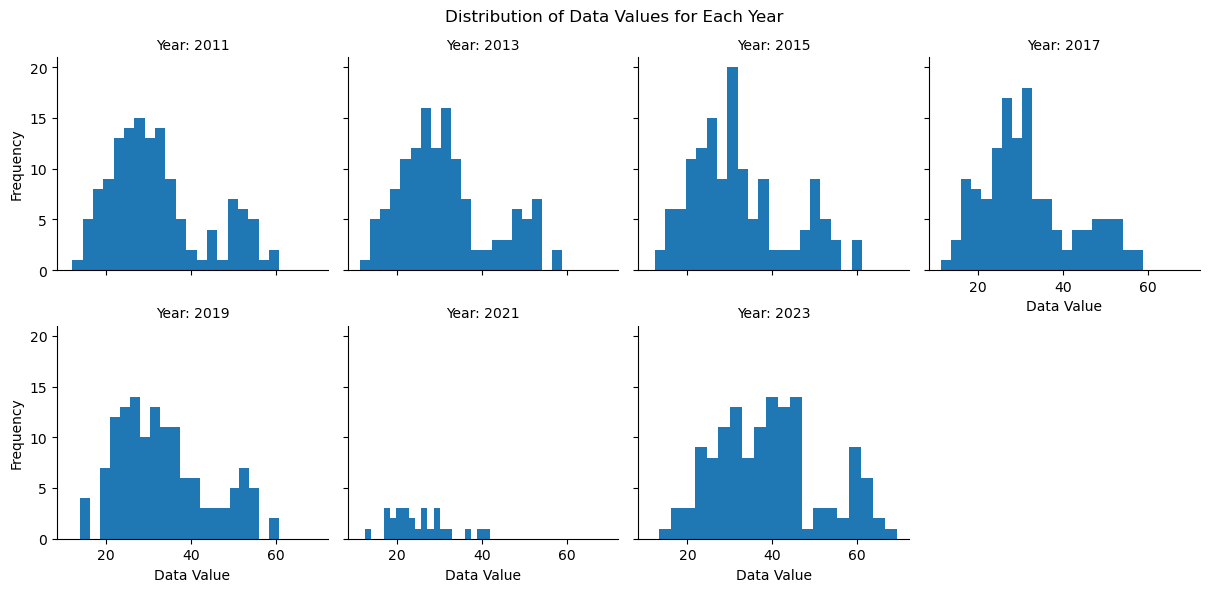

In [28]:
### New viz with just full nation
# Create the facet grid of histograms
# Use FacetGrid to create a grid of histograms split by 'YearStart'
g = sns.FacetGrid(activity_US, col="Year", col_wrap=4, height=3)
g.map(plt.hist, 'Data_Value', bins=20)

# Adding some additional aesthetic enhancements
g.set_titles('Year: {col_name}')  # Set titles for each subplot
g.set_axis_labels('Data Value', 'Frequency')  # Set axis labels

# Adjust the axis and display the plots
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Data Values for Each Year')  # Overall title for all subplots

# Show the plot
plt.show()

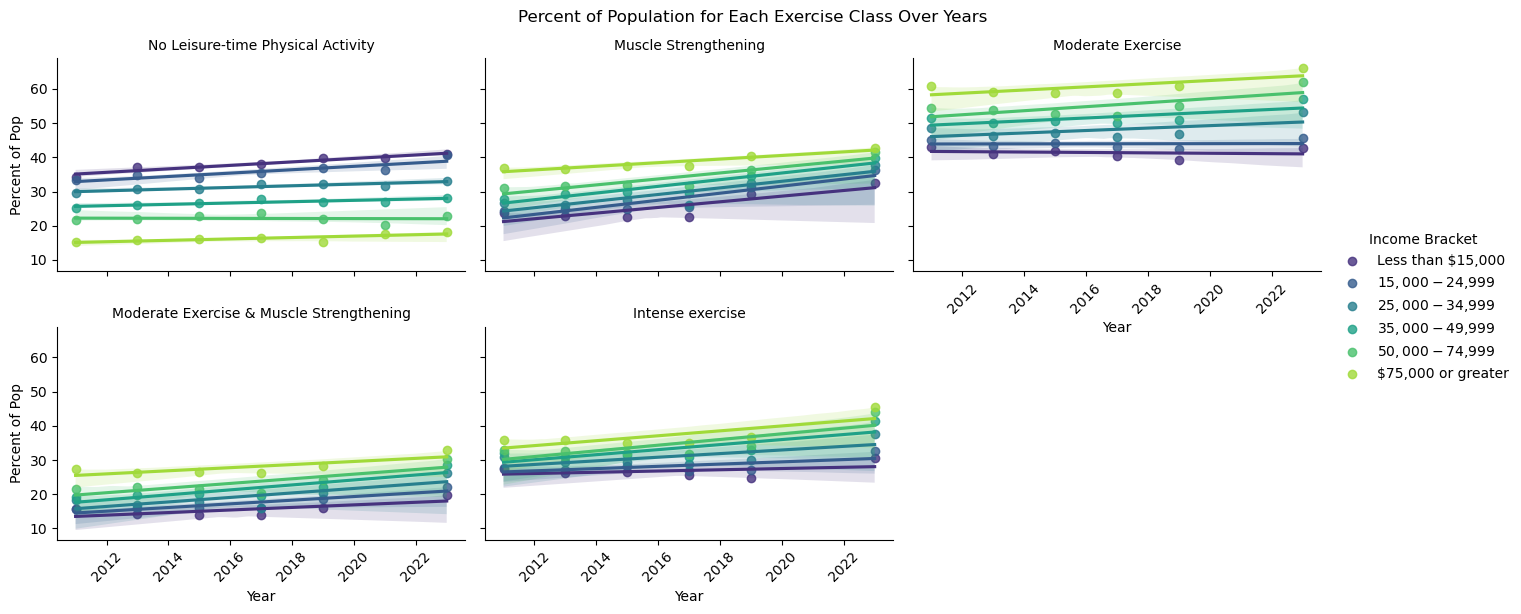

In [34]:
exercise_order = ['No Leisure-time Physical Activity','Muscle Strengthening','Moderate Exercise','Moderate Exercise & Muscle Strengthening', 'Intense exercise']

g = sns.FacetGrid(activity_US, col="Short_Question", hue='Income', hue_order=income_order, col_order=exercise_order, col_wrap=3, aspect=1.5, palette='viridis')
g.map(sns.regplot, 'YearStart', 'Data_Value', )

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Enhancing the plot with titles and labels
g.set_titles('{col_name}')  # Set titles to be each question
g.set_axis_labels('Year', 'Percent of Pop')  # Set common axis labels

# Adjust the top space to accommodate title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Percent of Population for Each Exercise Class Over Years')

# Adding the legend
g.add_legend(title='Income Bracket')
# Show the plot
plt.show()

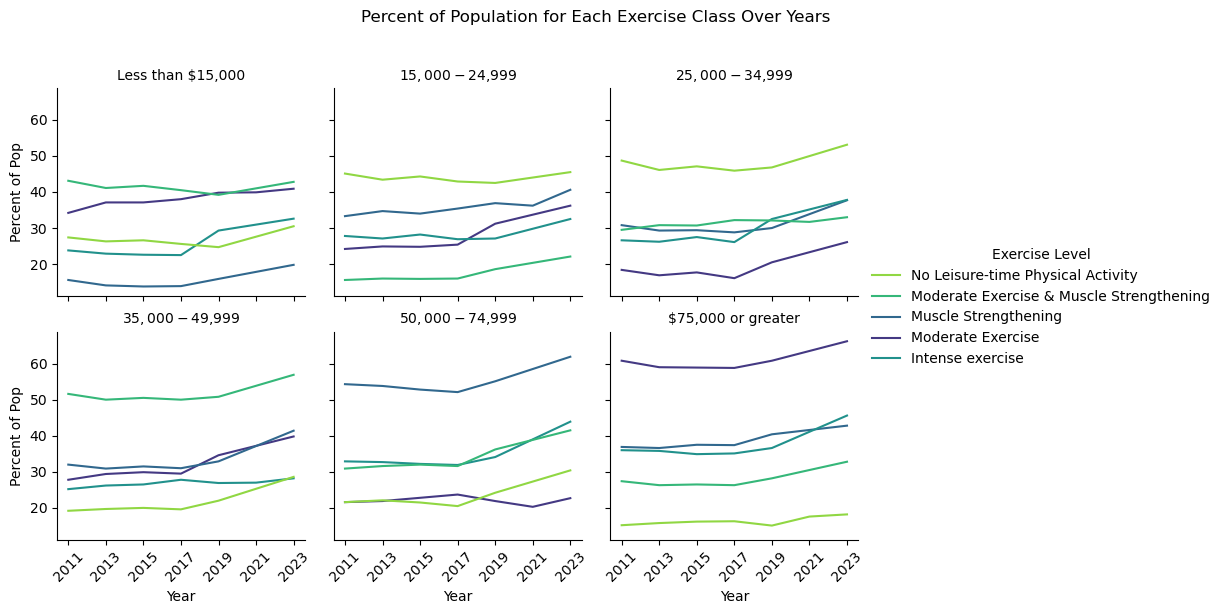

In [33]:
g = sns.FacetGrid(activity_US, col="Income", col_order=income_order, col_wrap=3)
g.map(sns.lineplot, 'Year', 'Data_Value', 'Short_Question', palette='viridis')

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Enhancing the plot with titles and labels
g.set_titles('{col_name}')  # Set titles to be each Income Bracket
g.set_axis_labels('Year', 'Percent of Pop')  # Set common axis labels

# Adjust the top space to accommodate title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Percent of Population for Each Exercise Class Over Years')

# Adding the legend
g.add_legend(title='Exercise Level')
# Show the plot
plt.show()